### Big Mac Price EDA and Visualization - For each country from 2000 to 2022

Link to Data: https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice

#### Necessary Imports

In [7]:
%matplotlib inline
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

#### Read in Data

In [8]:
df = pd.read_csv('BigmacPrice.csv')

In [9]:
df

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85
...,...,...,...,...,...,...
1941,2022-07-01,AED,United Arab Emirates,18.00,3,6.00
1942,2022-07-01,USD,United States,5.15,1,5.15
1943,2022-07-01,UYU,Uruguay,255.00,41,6.22
1944,2022-07-01,VES,Venezuela,10.00,5,2.00


#### Describe Data

In [10]:
df.shape

(1946, 6)

In [11]:
df.describe()

,local_price,dollar_ex,dollar_price
count,1.946000e+03,1.946000e+03,1946.000000
mean,1.581609e+04,4.722255e+03,3.568011
std,3.940050e+05,1.006232e+05,1.417054
min,0.000000e+00,1.000000e+00,0.000000
25%,4.450000e+00,1.000000e+00,2.572500
50%,1.500000e+01,5.000000e+00,3.400000
75%,8.700000e+01,3.200000e+01,4.240000
max,1.602000e+07,3.613989e+06,11.250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1946 non-null   object 
 1   currency_code  1946 non-null   object 
 2   name           1946 non-null   object 
 3   local_price    1946 non-null   float64
 4   dollar_ex      1946 non-null   int64  
 5   dollar_price   1946 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 91.3+ KB


In [13]:
df.columns

Index(['date', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price'],
      dtype='object')

In [14]:
df.dtypes

date              object
currency_code     object
name              object
local_price      float64
dollar_ex          int64
dollar_price     float64
dtype: object

#### Convert date from object to pandas datetime

In [15]:
df['date'] = df['date'].apply(pd.to_datetime)

In [16]:
df.dtypes

date             datetime64[ns]
currency_code            object
name                     object
local_price             float64
dollar_ex                 int64
dollar_price            float64
dtype: object

In [17]:
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


#### Use Date as index

In [18]:
df = df.set_index('date')
df.head()

,currency_code,name,local_price,dollar_ex,dollar_price
date,,,,,
2000-04-01,ARS,Argentina,2.50,1,2.50
2000-04-01,AUD,Australia,2.59,1,2.59
2000-04-01,BRL,Brazil,2.95,1,2.95
2000-04-01,GBP,Britain,1.90,1,1.90
2000-04-01,CAD,Canada,2.85,1,2.85


#### Create Year Column

In [19]:
#df.insert(0,'year','')
df['year'] = df.index.year
df

,currency_code,name,local_price,dollar_ex,dollar_price,year
date,,,,,,
2000-04-01,ARS,Argentina,2.50,1,2.50,2000
2000-04-01,AUD,Australia,2.59,1,2.59,2000
2000-04-01,BRL,Brazil,2.95,1,2.95,2000
2000-04-01,GBP,Britain,1.90,1,1.90,2000
2000-04-01,CAD,Canada,2.85,1,2.85,2000
...,...,...,...,...,...,...
2022-07-01,AED,United Arab Emirates,18.00,3,6.00,2022
2022-07-01,USD,United States,5.15,1,5.15,2022
2022-07-01,UYU,Uruguay,255.00,41,6.22,2022


#### Is our data clean?

In [20]:
df.isna().sum()

currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
year             0
dtype: int64

In [21]:
df.duplicated().sum()

220

#### Print unique values

In [22]:
print(df.index.unique())
print()

print(df.currency_code.unique())
print()

print(df.name.unique())

DatetimeIndex(['2000-04-01', '2001-04-01', '2002-04-01', '2003-04-01',
               '2004-05-01', '2005-06-01', '2006-01-01', '2006-05-01',
               '2007-01-01', '2007-06-01', '2008-06-01', '2009-07-01',
               '2010-01-01', '2010-07-01', '2011-07-01', '2012-01-01',
               '2012-07-01', '2013-01-01', '2013-07-01', '2014-01-01',
               '2014-07-01', '2015-01-01', '2015-07-01', '2016-01-01',
               '2016-07-01', '2017-01-01', '2017-07-01', '2018-01-01',
               '2018-07-01', '2019-01-01', '2019-07-09', '2020-01-14',
               '2020-07-01', '2021-01-01', '2021-07-01', '2022-01-01',
               '2022-07-01'],
              dtype='datetime64[ns]', name='date', freq=None)

['ARS' 'AUD' 'BRL' 'GBP' 'CAD' 'CLP' 'CNY' 'CZK' 'DKK' 'EUR' 'HKD' 'HUF'
 'IDR' 'ILS' 'JPY' 'MYR' 'MXN' 'NZD' 'PLN' 'RUB' 'SGD' 'ZAR' 'KRW' 'SEK'
 'CHF' 'TWD' 'THB' 'USD' 'PHP' 'NOK' 'PEN' 'TRY' 'VEF' 'EGP' 'COP' 'CRC'
 'PKR' 'SAR' 'LKR' 'UAH' 'UYU' 'AED' 'INR' 'VND' 

#### Pandas Profiling Report

In [51]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Interactive Plotly Line Graph for all countries BIG Mac Prices

In [24]:
fig = px.line(df, x=df.index, y="dollar_price", color='name')
fig.update_layout(title='Average Global Big Mac Prices 2000 to 2022',
                    xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

#### Mean dollar price by country dataframe

In [25]:
df_price_mean = df.groupby(['name'])[['dollar_price']].mean().sort_values(by=['dollar_price'])
print(df_price_mean) 

             dollar_price
name                     
Oman             1.154444
Kuwait           1.155556
Bahrain          1.411111
Ukraine          1.978387
Russia           2.006111
...                   ...
Israel           5.296786
Brazil           5.325946
Sweden           5.648108
Switzerland      6.425946
Norway           6.783939

[74 rows x 1 columns]


#### Mean dollar price for world by date

In [26]:
df_world_yearly_mean = df.groupby(['date'])[['dollar_price']].mean()

print(df_world_yearly_mean)

            dollar_price
date                    
2000-04-01      2.323929
2001-04-01      2.157143
2002-04-01      2.301212
2003-04-01      2.425312
2004-05-01      2.444000
2005-06-01      2.715122
2006-01-01      2.749687
2006-05-01      2.823171
2007-01-01      2.943659
2007-06-01      3.200732
2008-06-01      3.649000
2009-07-01      3.463171
2010-01-01      3.648293
2010-07-01      3.755854
2011-07-01      4.011818
2012-01-01      3.890909
2012-07-01      3.788491
2013-01-01      4.131636
2013-07-01      3.946727
2014-01-01      3.897321
2014-07-01      3.918596
2015-01-01      3.676250
2015-07-01      3.607321
2016-01-01      3.442857
2016-07-01      3.731607
2017-01-01      3.739286
2017-07-01      3.848929
2018-01-01      3.893571
2018-07-01      3.602083
2019-01-01      3.599444
2019-07-09      3.669861
2020-01-14      3.716111
2020-07-01      3.718750
2021-01-01      3.769028
2021-07-01      3.816164
2022-01-01      3.915479
2022-07-01      4.003571


<function matplotlib.pyplot.show(close=None, block=None)>

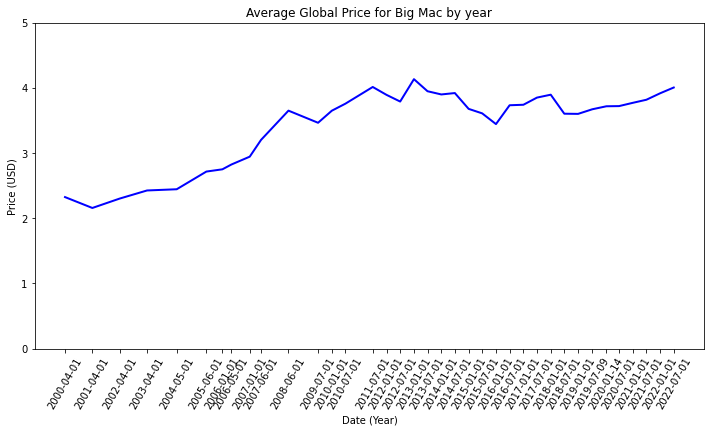

In [27]:
x=df_world_yearly_mean.index
y=df_world_yearly_mean["dollar_price"]
plt.figure(figsize=(12, 6))
plt.plot(x,y, linewidth=2, color='b')
plt.xlabel("Date (Year)")
plt.ylabel("Price (USD)")
plt.title("Average Global Price for Big Mac by year")
plt.yticks([0,1,2,3,4,5])
plt.xticks(df_world_yearly_mean.index,rotation=60)
plt.show

In [28]:
# Interactive graph for world mean prices
fig = px.line(df_world_yearly_mean,x=df_world_yearly_mean.index, y="dollar_price")
fig.update_layout(title='Average Global Big Mac Prices 2000 to 2022',
                    xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

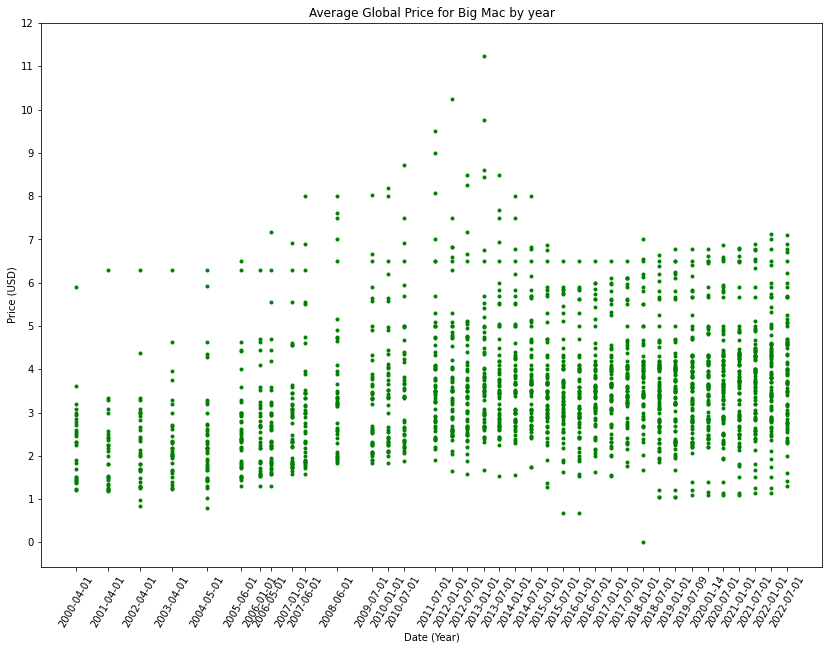

In [29]:
x=df.index
y=df["dollar_price"]
plt.figure(figsize=(14, 10))
plt.scatter(x,y, marker='.', linewidth=1, color='g')
plt.xlabel("Date (Year)")
plt.ylabel("Price (USD)")
plt.title("Average Global Price for Big Mac by year")
plt.yticks([i for i in range(13)])
plt.xticks(df_world_yearly_mean.index,rotation=60)
plt.show

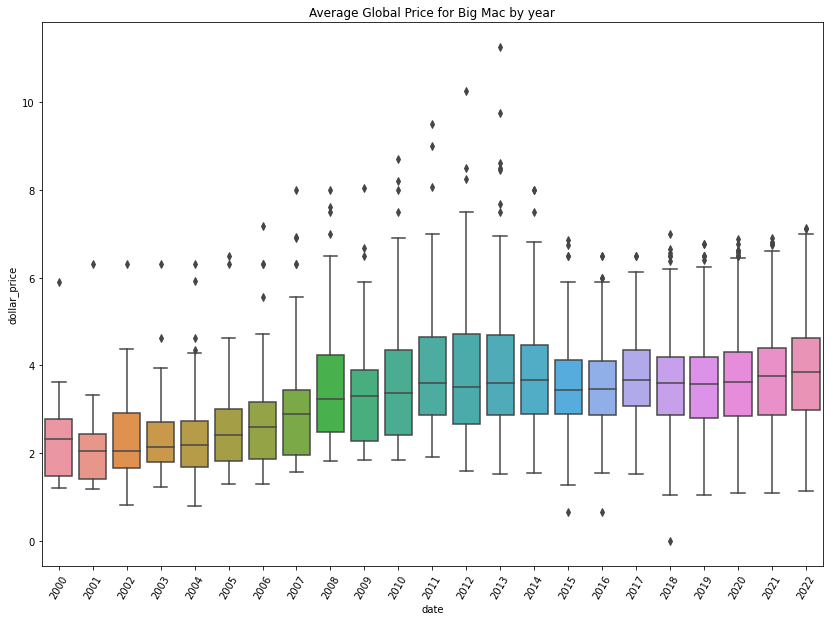

In [30]:
fig, ax = plt.subplots(figsize=(14,10))
sns.boxplot(data=df, x=df.index.year, y='dollar_price')
ax.set_title('Average Global Price for Big Mac by year')
plt.xticks(rotation=60)
plt.show()

#### Plot dollar prices for 2022

In [31]:
newest_df=df[df.index == "2022-07-01"].sort_values(by=['dollar_price'])
newest_df

,currency_code,name,local_price,dollar_ex,dollar_price,year
date,,,,,,
2022-07-01,KWD,Kuwait,1.30,1,1.30,2022
2022-07-01,OMR,Oman,1.42,1,1.42,2022
2022-07-01,BHD,Bahrain,1.60,1,1.60,2022
2022-07-01,VES,Venezuela,10.00,5,2.00,2022
2022-07-01,JOD,Jordan,2.30,1,2.30,2022
...,...,...,...,...,...,...
2022-07-01,CHF,Switzerland,6.50,1,6.50,2022
2022-07-01,AUD,Australia,6.70,1,6.70,2022
2022-07-01,CAD,Canada,6.77,1,6.77,2022


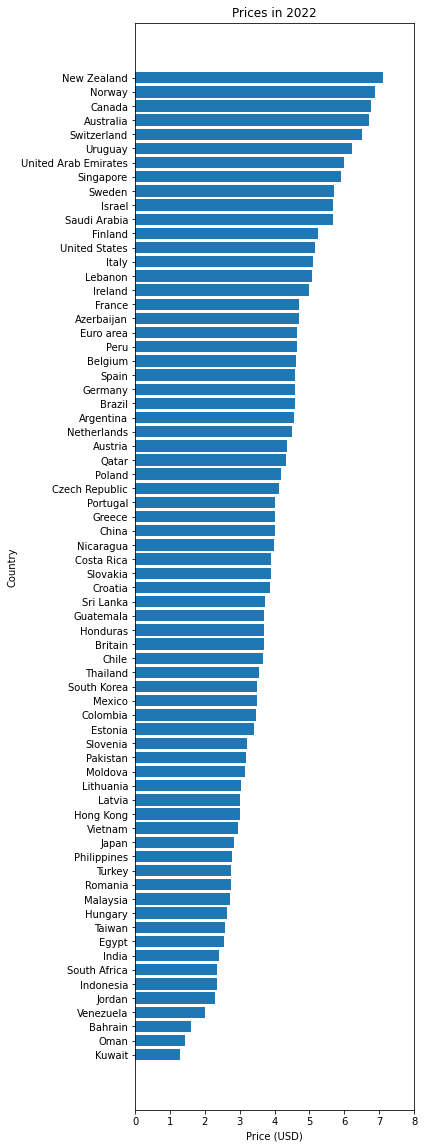

In [32]:
x=newest_df["name"]
y=newest_df["dollar_price"]
plt.figure(figsize=(5, 20))
plt.barh(x,y)
plt.xlabel("Price (USD)")
plt.ylabel("Country")
plt.title("Prices in 2022")
plt.xticks([0,1,2,3,4,5,6,7,8])
#plt.yticks([])
plt.show()

#### Dollar prices in 2000

In [33]:
df_2000=df[df.index == "2000-04-01"].sort_values(by=['dollar_price'])
df_2000

,currency_code,name,local_price,dollar_ex,dollar_price,year
date,,,,,,
2000-04-01,HUF,Hungary,339.00,279,1.22,2000
2000-04-01,CNY,China,9.90,8,1.24,2000
2000-04-01,PLN,Poland,5.50,4,1.38,2000
2000-04-01,CZK,Czech Republic,54.37,39,1.39,2000
2000-04-01,RUB,Russia,39.50,28,1.41,2000
2000-04-01,THB,Thailand,55.00,38,1.45,2000
2000-04-01,HKD,Hong Kong,10.20,7,1.46,2000
2000-04-01,ZAR,South Africa,9.00,6,1.50,2000
2000-04-01,MYR,Malaysia,4.52,3,1.51,2000


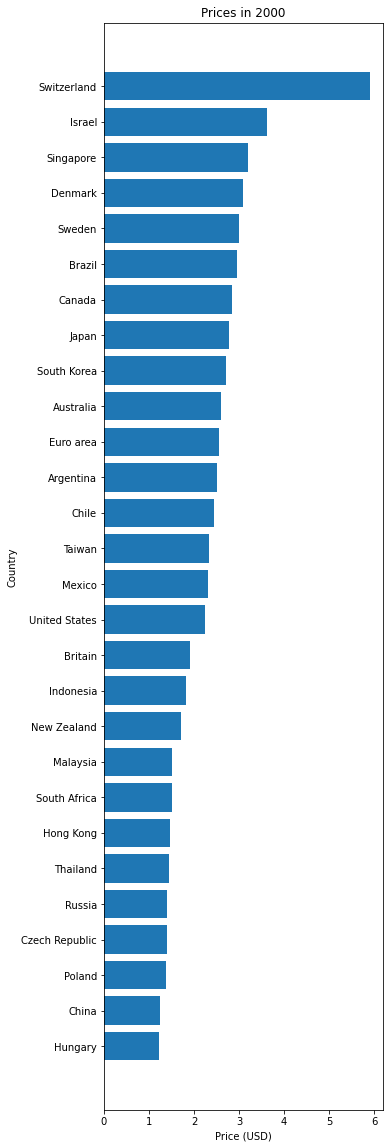

In [34]:
x=df_2000["name"]
y=df_2000["dollar_price"]
plt.figure(figsize=(5, 20))
plt.barh(x,y)
plt.xlabel("Price (USD)")
plt.ylabel("Country")
plt.title("Prices in 2000")
plt.xticks([0,1,2,3,4,5,6])
#plt.yticks([])
plt.show()

#### Alphabetize all countries

In [35]:
all_countries = ['Argentina','Australia','Brazil','Britain','Canada','Chile','China',
'Czech Republic', 'Denmark', 'Euro area', 'Hong Kong', 'Hungary', 'Indonesia',
'Israel', 'Japan', 'Malaysia', 'Mexico', 'New Zealand', 'Poland','Russia',
'Singapore', 'South Africa', 'South Korea', 'Sweden', 'Switzerland', 'Taiwan',
'Thailand', 'United States', 'Philippines', 'Norway', 'Peru', 'Turkey',
'Venezuela', 'Egypt', 'Colombia', 'Costa Rica', 'Pakistan', 'Saudi Arabia',
'Sri Lanka', 'Ukraine', 'Uruguay', 'UAE', 'Austria', 'Belgium', 'Estonia',
'Finland', 'France', 'Germany', 'Greece', 'India', 'Ireland', 'Italy',
'Netherlands', 'Portugal', 'Spain', 'Lithuania', 'Vietnam', 'Azerbaijan',
'Bahrain', 'Croatia', 'Guatemala', 'Honduras', 'Jordan', 'Kuwait', 'Latvia',
'Lebanon', 'Moldova', 'Nicaragua', 'Oman', 'Qatar', 'Romania', 'Slovakia',
'Slovenia', 'United Arab Emirates']
all_countries = sorted(all_countries)

In [36]:
print(all_countries)

['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Belgium', 'Brazil', 'Britain', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Euro area', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay', 'Venezuela', 'Vietnam']


#### Eurozone Big Mac Prices

In [37]:
eurozone_countries = ['Austria', 'Belgium', 'Estonia', 'Euro area', 'Finland', 'France',
                     'Germany', 'Greece', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                     'Malta', 'Netherlands', 'Portugal', 'Slovakia', 'Slovenia', 'Spain']

In [38]:
df_eurozone = df[df['name'].isin(eurozone_countries)]
df_eurozone

,currency_code,name,local_price,dollar_ex,dollar_price,year
date,,,,,,
2000-04-01,EUR,Euro area,2.56,1,2.56,2000
2001-04-01,EUR,Euro area,2.57,1,2.57,2001
2002-04-01,EUR,Euro area,2.67,1,2.67,2002
2003-04-01,EUR,Euro area,2.71,1,2.71,2003
2004-05-01,EUR,Euro area,2.74,1,2.74,2004
...,...,...,...,...,...,...
2022-07-01,EUR,Netherlands,4.50,1,4.50,2022
2022-07-01,EUR,Portugal,4.00,1,4.00,2022
2022-07-01,EUR,Slovakia,3.90,1,3.90,2022


In [39]:
df_eurozone

,currency_code,name,local_price,dollar_ex,dollar_price,year
date,,,,,,
2000-04-01,EUR,Euro area,2.56,1,2.56,2000
2001-04-01,EUR,Euro area,2.57,1,2.57,2001
2002-04-01,EUR,Euro area,2.67,1,2.67,2002
2003-04-01,EUR,Euro area,2.71,1,2.71,2003
2004-05-01,EUR,Euro area,2.74,1,2.74,2004
...,...,...,...,...,...,...
2022-07-01,EUR,Netherlands,4.50,1,4.50,2022
2022-07-01,EUR,Portugal,4.00,1,4.00,2022
2022-07-01,EUR,Slovakia,3.90,1,3.90,2022


In [40]:
# Check to see if all countries currency code is the euro
df_eurozone.currency_code.unique()

array(['EUR'], dtype=object)

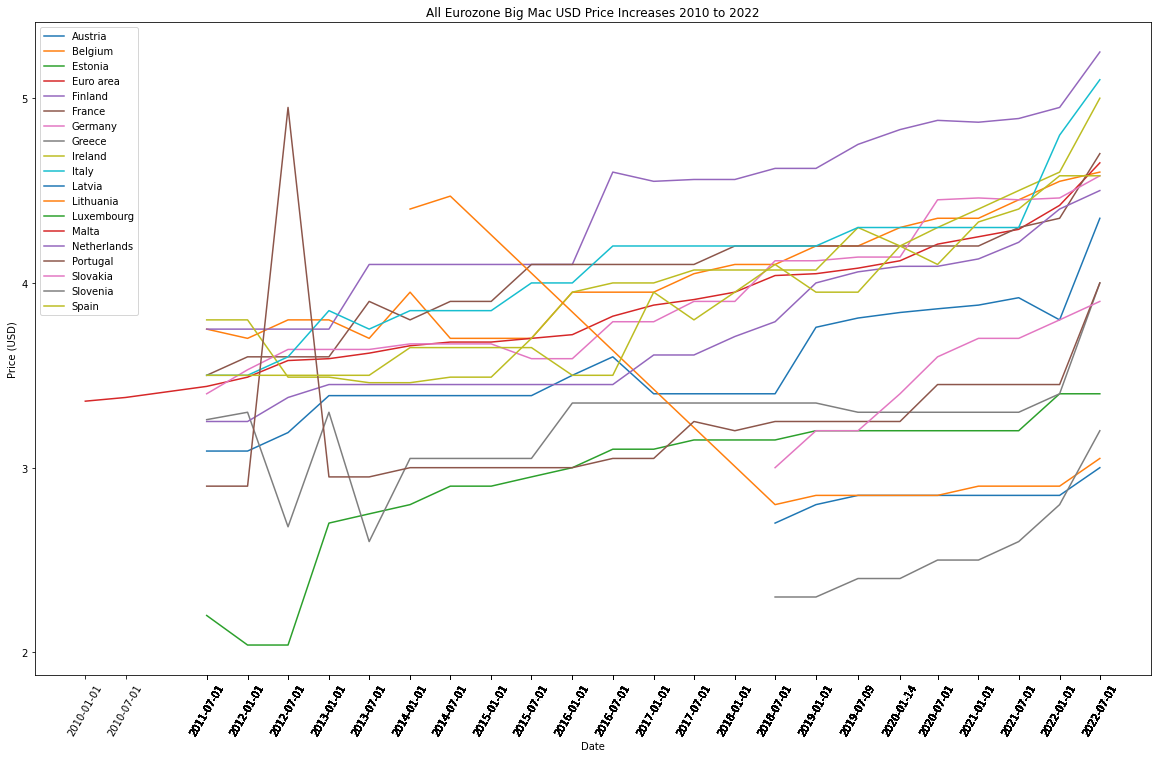

In [41]:
df_eurozone_post2010 = df_eurozone.loc[df_eurozone.index>='2010-01-01']

plt.figure(figsize=(20,12))

for i in eurozone_countries:
    x=(df_eurozone_post2010[df_eurozone_post2010['name']==i].index)
    y=(df_eurozone_post2010[df_eurozone_post2010['name']==i]['dollar_price'])
    plt.plot(x,y,linewidth=1.5, label=i)

plt.title('All Eurozone Big Mac USD Price Increases 2010 to 2022')
plt.yticks([2,3,4,5])
plt.xticks(df_eurozone_post2010.index, rotation=60)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.show()

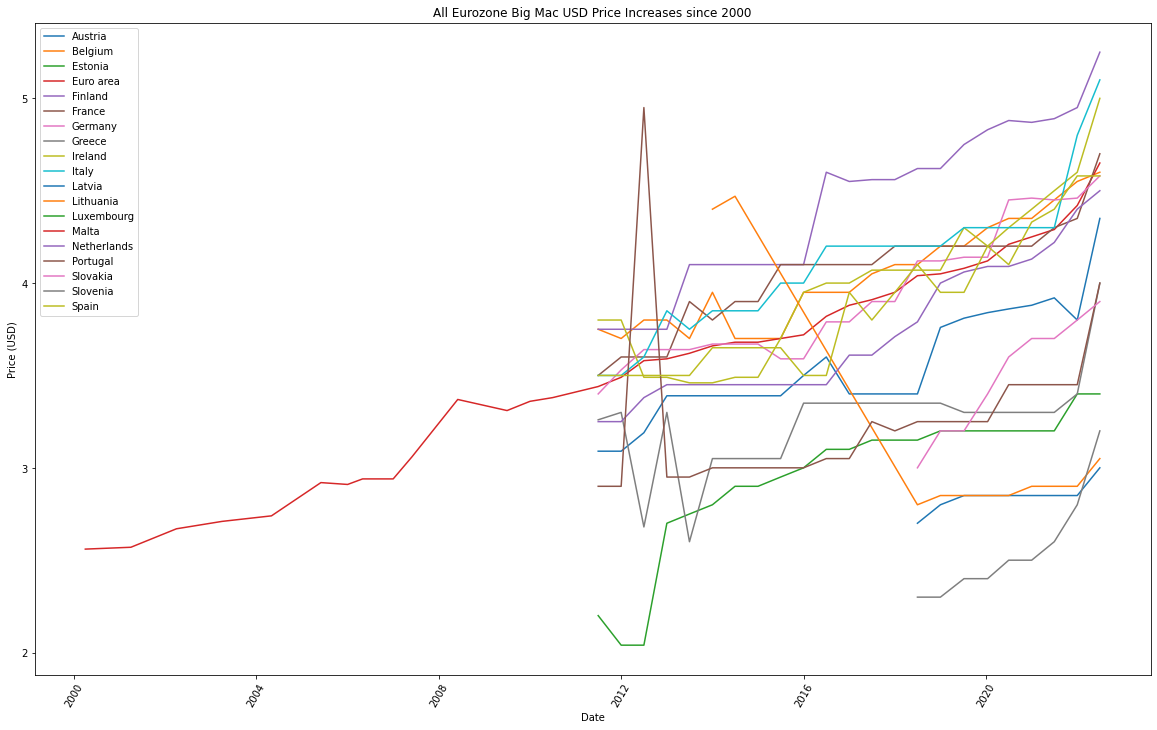

In [42]:
plt.figure(figsize=(20,12))

for i in eurozone_countries:
    x=(df_eurozone[df_eurozone['name']==i].index)
    y=(df_eurozone[df_eurozone['name']==i]['dollar_price'])
    plt.plot(x,y,linewidth=1.5, label=i)

plt.title('All Eurozone Big Mac USD Price Increases since 2000')
plt.yticks([2,3,4,5])
plt.xticks(rotation=60)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.show()

#### Eurozone Interactive Graphs with Plotly

In [43]:
fig = px.line(df_eurozone_post2010, x=df_eurozone_post2010.index, y="dollar_price", color='name')
fig.update_layout(title='Eurozone Big Mac Prices 2000 to 2022',
                    xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

In [44]:
fig = px.line(df_eurozone, x=df_eurozone.index, y="dollar_price", color='name')
fig.update_layout(title='Eurozone Big Mac Prices 2000 to 2022',
                    xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

#### USA Dataframe

In [45]:
us_df = df[df['name']=='United States']

In [46]:
us_df

,currency_code,name,local_price,dollar_ex,dollar_price,year
date,,,,,,
2000-04-01,USD,United States,2.24,1,2.24,2000
2001-04-01,USD,United States,2.24,1,2.24,2001
2002-04-01,USD,United States,2.35,1,2.35,2002
2003-04-01,USD,United States,2.46,1,2.46,2003
2004-05-01,USD,United States,2.47,1,2.47,2004
2005-06-01,USD,United States,2.58,1,2.58,2005
2006-01-01,USD,United States,2.67,1,2.67,2006
2006-05-01,USD,United States,2.78,1,2.78,2006
2007-01-01,USD,United States,2.89,1,2.89,2007


In [47]:
us_df.describe()

,local_price,dollar_ex,dollar_price,year
count,37.000000,37.0,37.000000,37.000000
mean,3.840541,1.0,3.840541,2012.513514
std,0.915987,0.0,0.915987,6.401483
min,2.240000,1.0,2.240000,2000.000000
25%,3.000000,1.0,3.000000,2007.000000
50%,4.180000,1.0,4.180000,2013.000000
75%,4.610000,1.0,4.610000,2018.000000
max,5.150000,1.0,5.150000,2022.000000


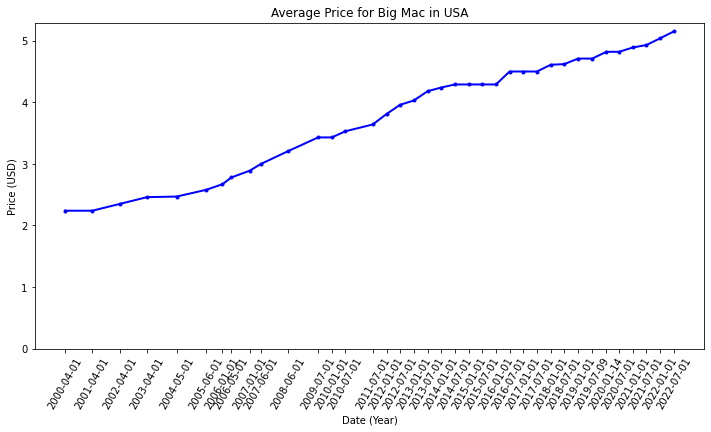

In [48]:
x=us_df.index
y=us_df["dollar_price"]
plt.figure(figsize=(12, 6))
plt.plot(x,y, 'b.-', linewidth=2)
plt.xlabel("Date (Year)")
plt.ylabel("Price (USD)")
plt.title("Average Price for Big Mac in USA")
plt.yticks([0,1,2,3,4,5])
plt.xticks(us_df.index,rotation=60)
plt.show()

#### Interactive Plotly for USA prices

In [49]:
fig = px.line(us_df, x=us_df.index, y="dollar_price", color='name')
fig.update_layout(title='USA Big Mac Prices 2000 to 2022',
                    xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()

#### Plot by year mean world price vs mean USA price vs mean Eurozone Price

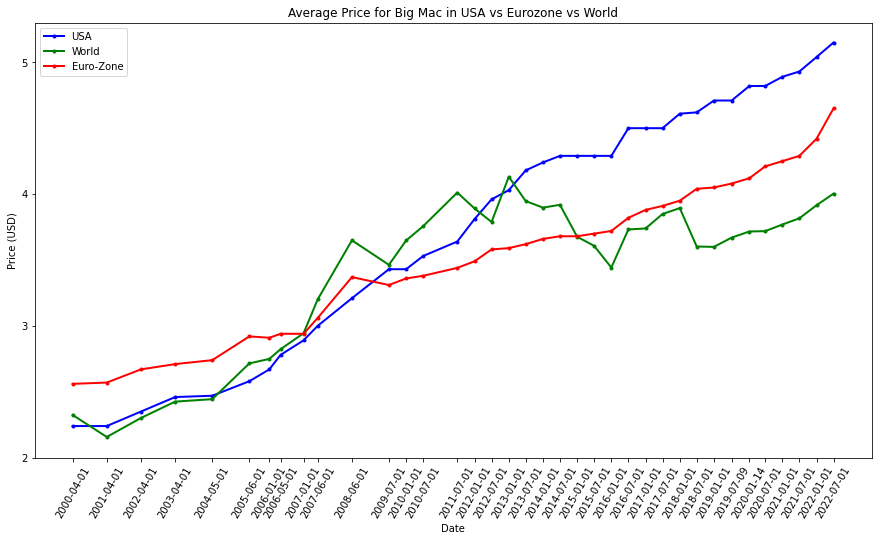

In [50]:
x1=us_df.index
y1=us_df["dollar_price"]
plt.figure(figsize=(15, 8))
plt.plot(x1,y1, 'b.-', linewidth=2, label='USA' )
plt.xlabel("Date")
plt.ylabel("Price (USD)")

x2=df_world_yearly_mean.index
y2=df_world_yearly_mean["dollar_price"]
plt.plot(x2,y2, 'g.-', linewidth=2, label='World')

x3 = df_eurozone[df_eurozone['name']=='Euro area'].index
y3 = df_eurozone[df_eurozone['name']=='Euro area'].dollar_price
plt.plot(x3, y3, 'r.-', linewidth=2, label="Euro-Zone")

plt.title("Average Price for Big Mac in USA vs Eurozone vs World")
plt.legend()
plt.yticks([2,3,4,5])
plt.xticks(df_world_yearly_mean.index, rotation=60)
plt.show()